For this project, you will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

During this project, you will analyze, prepare, and plot data in order to answer questions in a meaningful way.

After you perform your analysis, you’ll be creating a blog post to share your findings on the World Health Organization website.

In [1]:
from pyforest import *

In [2]:
data= pd.read_csv('all_data.csv')

<IPython.core.display.Javascript object>

In [3]:
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [5]:
from pandas_profiling import ProfileReport

In [6]:
report = ProfileReport(data)

In [7]:
report

From the above report we can see Data is good all most clean, from the pearson correlation we can see there is strong correlation between GDP , Life expectancy,Year. We can figure this out with our EDA process one by one

In [8]:
data.columns=['country','year','avg_age','gdp']

In [9]:
#Lets Create a Function that will create a relation between Year,life Expectancy with respect to different country

def EDA_features(country,life_expectancy,data):
    fig,axs = plt.subplots(2,3, sharex=True, sharey=True, figsize=(14,7))
    axs = axs.flatten()
    Years = data.year.unique()
    Countries = data.country.unique()
    
    for i,cty in enumerate(Countries):
        sns.set_palette("Paired")
        sns.stripplot(x = "year", y = "avg_age",
                    data = data[data.country==cty],ax=axs[i])
        axs[i].set_xticks(range(len(Years)))
        axs[i].set_xticklabels(Years,rotation=90)
        axs[i].set_title(f"{cty}")
        plt.style.use('fivethirtyeight')
        plt.xlabel('year')
        plt.ylabel(f"{life_expectancy}")
    plt.suptitle(f'{country} vs {life_expectancy} Relationship')
    plt.show()  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

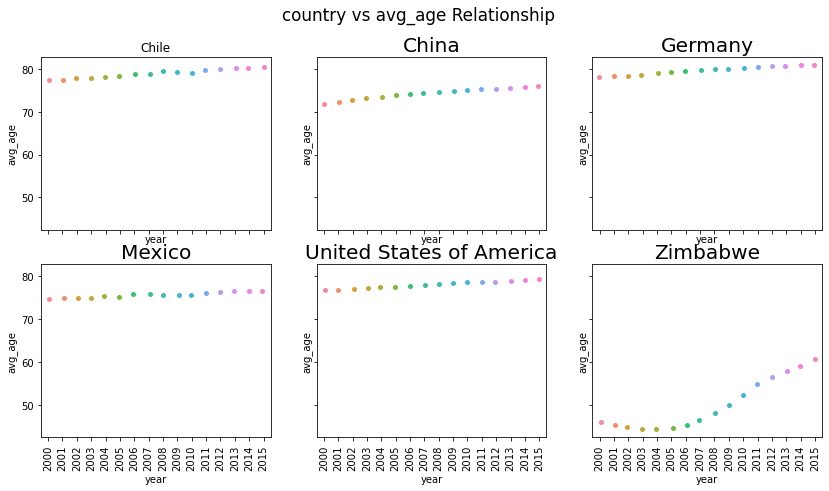

In [10]:
EDA_features('country','avg_age',data)

From the above visualization we can see countries like Mexico,USA,Germany,Chili,China have Life expectancy rate is quite smooth,
It shows only exception in Countries like Zimbabwe Which increased after sequencially from 2007 to onwards

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

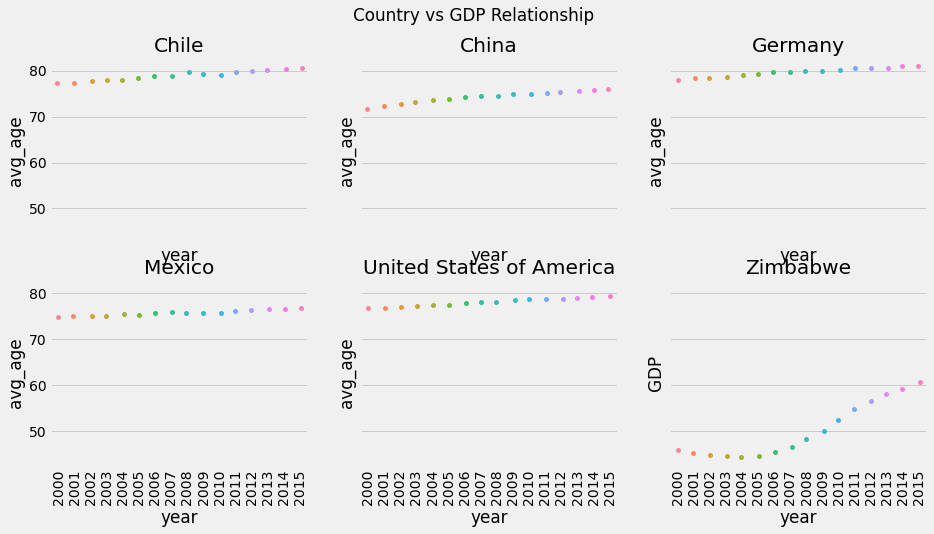

In [11]:
EDA_features('Country','GDP',data)

As We can See From GDP Year By Year Relationship Different Countries Performance On GDP
1. Germany there is no consistency in their GDP from 2007 onwards one year it increasing another year it is decreasing
2. Chiles' GDP From 2009 onwards increasing consistently as well as Zimbabwe,USA
3. China Has a consistency in his GDP growth from the Year 2000 onwards

Now lets Compare GDP Vs Life Expectancy, To find out is their any relationship, We will be using Different Visualization for this sns.Facetgrid()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

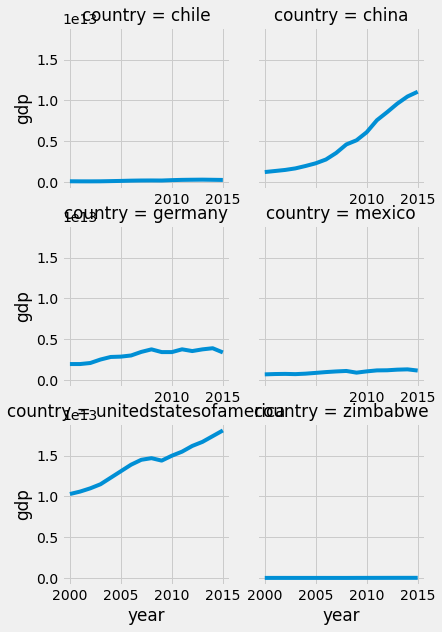

In [12]:
data.country=data.country.apply(lambda x:x.replace(" ",'').lower(),)
g = sns.FacetGrid(data,col='country',col_wrap=2,despine=False)
g.map(sns.lineplot,'year','gdp').add_legend()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

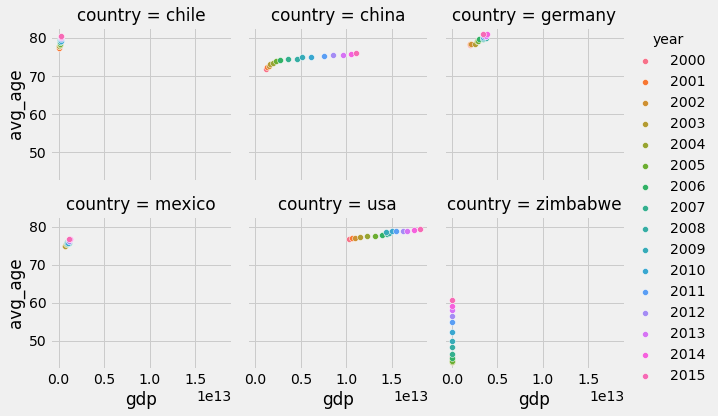

In [13]:
data.country.replace(to_replace={'unitedstatesofamerica':'usa'},inplace=True)
g = sns.FacetGrid(data,col='country',col_wrap=3,despine=False,hue='year')
g.map(sns.scatterplot,'gdp','avg_age').add_legend()
plt.show()

From Above Visualization we can see countries like Zimbabwe,Mexico,Chile are having low GDP 

Coming Back to our Scope of this project
if we are comparing GDP with life expectancy Zimbabwe is showing low GDP with low life expectancy, that doesn't answer to our very question, whether Life expectancy is affected by this GPD growth as in MEXICO and Chile Life Expectancy is in between 75-80,

To get More accurate result we need more data from more no of countries population, more feature column like climatic condition,luxury etc